# Author : Ratndeep Chavan
# Organization : The Spark Foundation
# Internship : Data Science & Business Analytics (#gripmarch21)
# Task 2 : Prediction Using Unsupervised ML
# Task Level : Beginner
## Task To perform : Predict optimum number of clusters and represent it visually

In [1]:
# importing require modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
tn = pd.read_csv('Iris.csv')
tn.to_csv('task-2')
tn.shape

(150, 6)

In [3]:
tn.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


#### Dropping Species column (label) as this is unsupervise problem

In [4]:
tn = tn.drop('Species', axis=1)
tn.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [5]:
tn.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
tn.Id.nunique()

150

## Observations :
1. No missing values.
2. Id column is not useful for prediction

In [7]:
tn = tn.drop('Id', axis=1)

In [8]:
tn

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Finding number of cluster using elbow method

Text(0, 0.5, 'Sum of Sqaures')

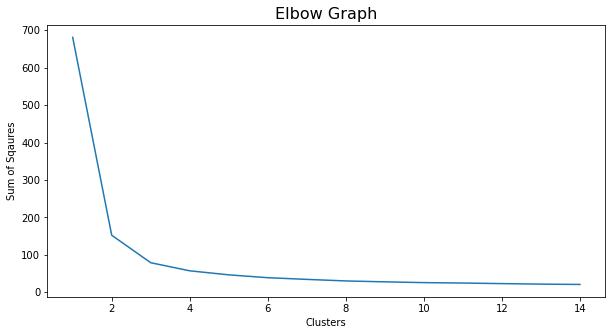

In [9]:
from sklearn.cluster import KMeans
ss = []

for i in range(1, 15):
    k = KMeans(n_clusters = i, random_state = 8)
    k.fit(tn)
    ss.append(k.inertia_)


plt.figure(figsize=(10,5))
sns.lineplot(range(1,15), ss)
plt.title('Elbow Graph', fontsize=16)
plt.xlabel('Clusters')
plt.ylabel('Sum of Sqaures')

### From above graph selecting number of clusters as 3 

In [10]:
k = KMeans(n_clusters = 3, random_state = 8)
k.fit(tn)
tn['Cluster'] = k.predict(tn)
tn

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
k.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

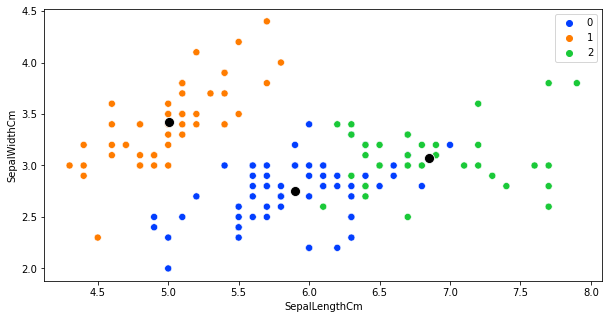

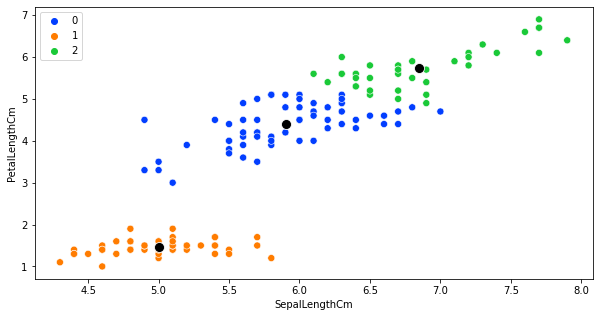

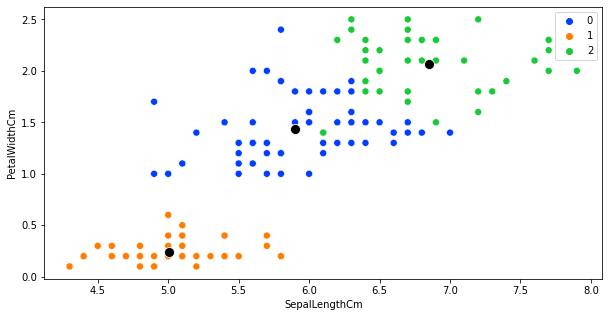

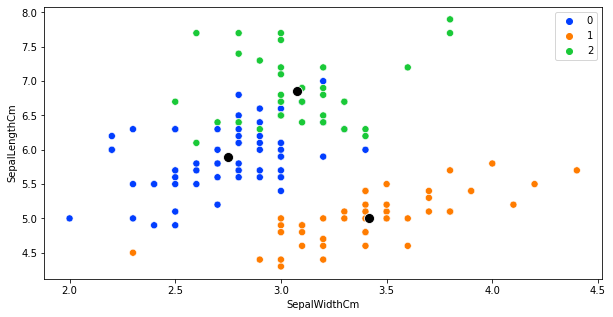

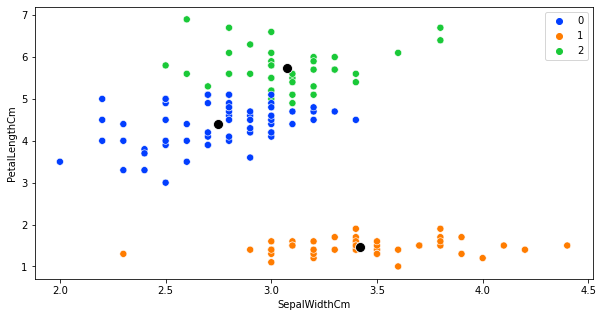

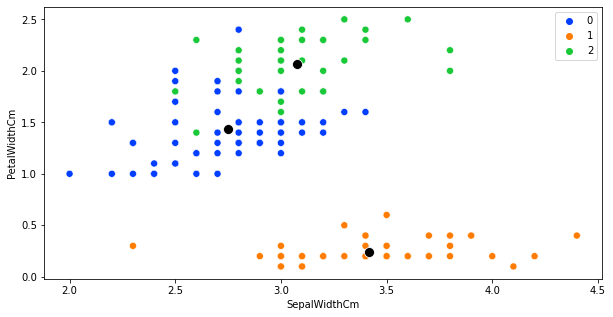

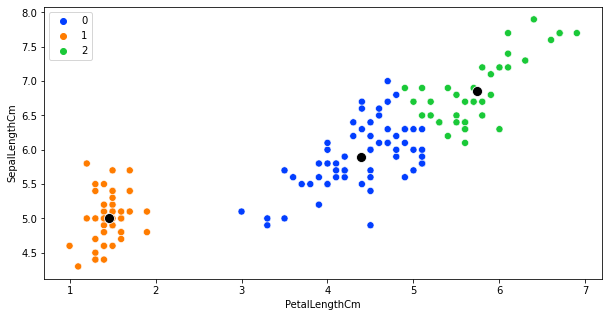

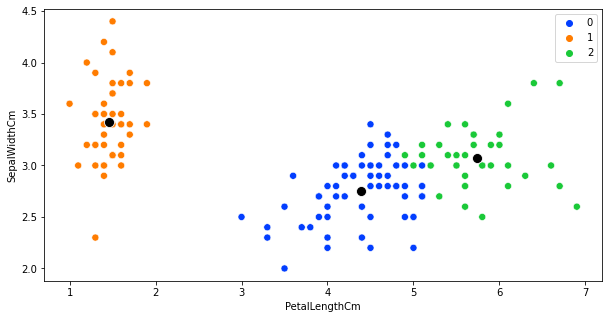

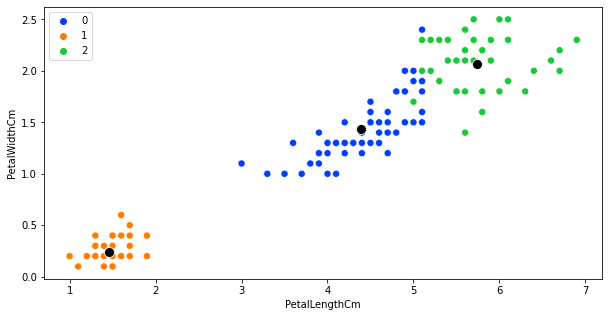

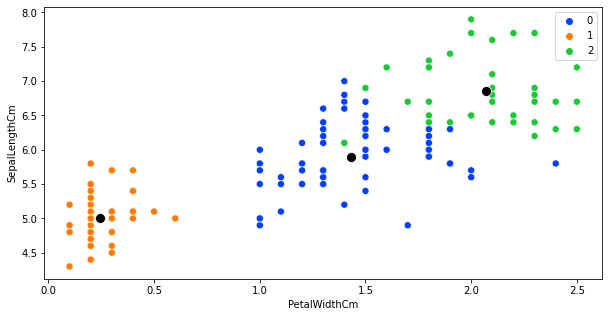

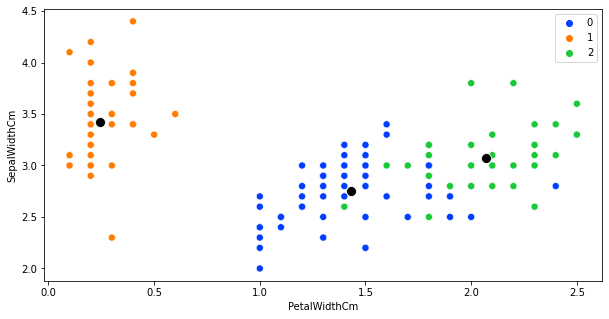

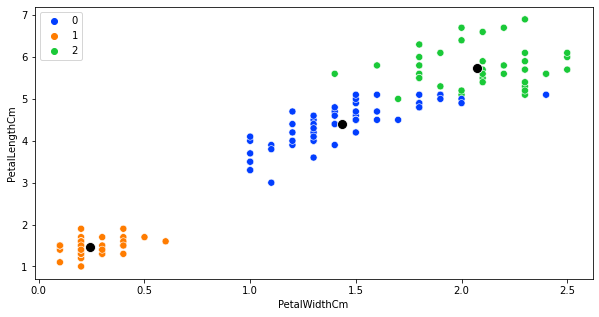

In [12]:
for i in tn.columns:
    c1 = list(tn.columns).index(i)
    for j in tn.columns:
        c2 = list(tn.columns).index(j)
        if i != j and i != 'Cluster' and j != 'Cluster':
            plt.figure(figsize=(10,5))
            sns.scatterplot(x=i, y=j, hue='Cluster', data=tn, palette='bright', s=50)
            sns.scatterplot(k.cluster_centers_[:, c1], k.cluster_centers_[:, c2], color='Black', s=100)
            plt.show()
            
# In above code c1 and c2 are used to get the position of cluster center.

# Optimum number of cluster are 3